# Image Testing Notebook
### This notebook exists to experiment with images in notebooks

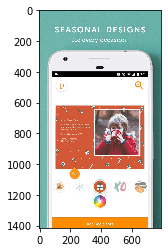

mwaya


In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("img1.png")
plt.imshow(image)
plt.show()
print("mwaya")

In [27]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://127.0.0.1:8888/notebooks/img1.png", width=400, height=200)

In [1]:
PATH = "/c/Users/Chrispine/summer/summerWork/"
Image("img2.png")

NameError: name 'Image' is not defined

In [1]:
import sys
print(sys.path)

['C:\\Users\\Chrispine\\summer\\summerWork', 'c:\\python37\\python37.zip', 'c:\\python37\\DLLs', 'c:\\python37\\lib', 'c:\\python37', '', 'C:\\Users\\Chrispine\\AppData\\Roaming\\Python\\Python37\\site-packages', 'c:\\python37\\lib\\site-packages', 'c:\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Chrispine\\.ipython']


In [2]:
import example
print(example.addThis(5,4))

9


In [4]:
import example2
print(example2.addThis(5,4))

In [32]:
import sys
# sys.path = sys.path[:-1]
print(sys.path)
# sys.path.append('example2')
print(sys.path)
import exampleOne
print(exampleOne.addThis(5,4))

['C:\\Users\\Chrispine\\summer\\summerWork', 'c:\\python37\\python37.zip', 'c:\\python37\\DLLs', 'c:\\python37\\lib', 'c:\\python37', '', 'C:\\Users\\Chrispine\\AppData\\Roaming\\Python\\Python37\\site-packages', 'c:\\python37\\lib\\site-packages', 'c:\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Chrispine\\.ipython', 'C:\\Users\\Chrispine\\summer\\summerWork\\example2']
['C:\\Users\\Chrispine\\summer\\summerWork', 'c:\\python37\\python37.zip', 'c:\\python37\\DLLs', 'c:\\python37\\lib', 'c:\\python37', '', 'C:\\Users\\Chrispine\\AppData\\Roaming\\Python\\Python37\\site-packages', 'c:\\python37\\lib\\site-packages', 'c:\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Chrispine\\.ipython', 'C:\\Users\\Chrispine\\summer\\summerWork\\example2']
9


In [3]:
import matplotlib
from ambrosia import *
i = Image()
help(i)

Help on Image in module ambrosia.cameras object:

class Image(ambrosia.objects.AmbrosiaObject)
 |  This class represents a rendering of what a camera sees.
 |  
 |  Images are the external representation of the view of a virtual scene
 |  from a camera.  Images can be manipulated directly, but they are typically
 |  generated by and associated with a camera.
 |  
 |  The most commonly used methods are used to control the size and aspect
 |  ratio of the image.   By default, images are 640pixels (wide) and 
 |  480pixels (tall), leading to an aspect ratio of 4::3, or 1.333.  By
 |  changing the width or height of an image, the image's size is scaled
 |  in a way to preserve the aspect ratio.  For example,
 |      i.width(320)
 |  would reduce the image's width from 640 to 320.  Ambrosia will maintain
 |  the current aspect ratio, unless told otherwise.  Thus the height of 
 |  the image will also change -- from 480 to 240.  It's also possible
 |  to change the height in the analagous wa

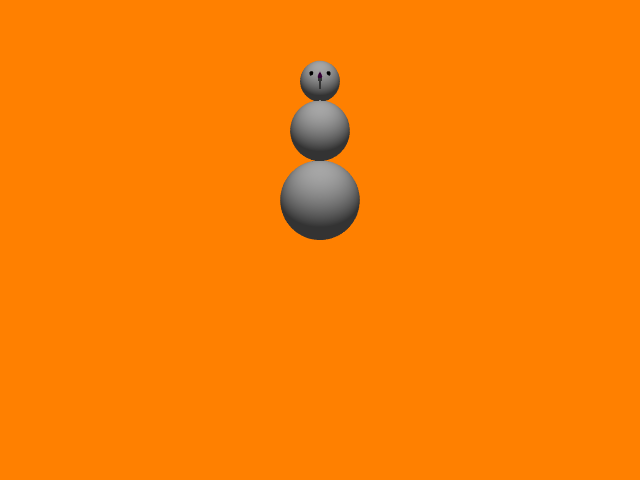

In [2]:
# Duane Bailey (c) 2014
# A snowman.
from ambrosia import *
def reset():
    global sphere, cube, cylinder, cone, scene, camera, image, bulb
    sphere = Sphere()
    cube = Cube()
    cylinder = Cylinder()
    cone = Cone()
    bulb = Light().color(white)
    scene = Group().add(bulb,translate(0,300,-300))
    camera = Camera().subject(scene)
    image = camera.getImage()

reset()
noseSize=.5
eyeSize=.1  # size of eye
eyeUp=10     # angle of eye, above noze
eyeAngle=25  # angle of eye, measured from midline

# an orange material
orange=(1,0.5,0)
orangePlaster = Material()
orangePlaster.type('plaster').color(orange)
head = Group()
head.add(sphere,whitePlaster)
head.add(cone,magentaPlaster,translate(0,50,0)*scale(0.24,1,0.24)*scale(noseSize)*xRot(-90)*translate(0,0,-45))
head.add(sphere,blackPlaster,scale(eyeSize),translate(0,0,-50)*xRot(eyeUp)*yRot(eyeAngle))
head.add(sphere,blackPlaster,scale(eyeSize),translate(0,0,-50)*xRot(eyeUp)*yRot(-eyeAngle))
head.translate(0,50,0)
head.scale(0.5)
# sphere.translate(0,50,0)
snowman = Group()
snowman.add(sphere,whitePlaster,translate(0,50,0))
snowman.add(sphere,whitePlaster,translate(0,50,0)*scale(.75)*translate(0,100,0))
snowman.add(head,orangePlaster,translate(0,175,0))
# A second head, for 13-old boys:
# snowman.add(head,purplePlaster,translate(0,225,0)*yRot(180))
scene.add(snowman,scale(golden))
# To see him in profile:
# scene.add(snowman,scale(golden)*yRot(-90))
#camera.getImage().dimensions(1500,600)
camera.getImage().background(orange)

camera.shoot()

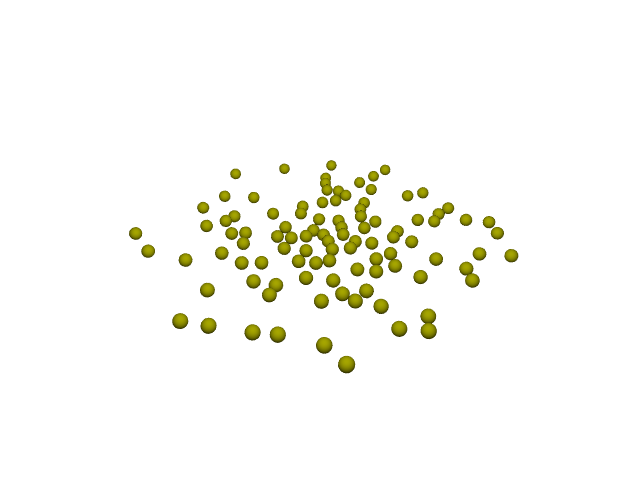

In [3]:
# place several spheres in scene, without overlap
# if this program takes a long time, it may be because it's impossible
# to pack that many objects within the constraints.  Beware.
from ambrosia import *
reset()
# spheres in the scene: initially, none
team = []
# how many have been added?  spheres
spheres = 0
while spheres < 100:
   # These balls are spheres, diameter 10.  all yellow
   s = Sphere().scale(.1).material(yellowPlaster)

   # distribute within a circle, radius 150
   a = rand(0,360)
   r = rand(0,150)

   # this transformation will place the sphere in a random location
   t = translate(r,0,0)*yRot(a)

   # this point is where the center of the sphere is
   pos = t( (0,0,0) )

   # have there been collisions? not yet
   collide = False

   # check all the spheres of the scene for overlap
   for member in team:
       # get the 'attribute' called 'position' (we add it, below)
       memberPos = member.get('position')

       # if the position is close to pos, we need to re-pick position
       if distance(pos,memberPos)<10:
           collide = True

   # if no collision had been detected, add the sphere to the scene
   # and to list of spheres
   if not collide:
       # set the attribute, position
       s.set('position',pos)
       # add it to the scene using transformation t
       scene.add(s,t)
       # add it to the list of team members
       team.append(s)
       # one more sphere: done
       spheres = spheres+1

# lift camera
camera.pos(xRot(30))
# shoot image
camera.shoot()
